
## Introduction

In this analysis, we will be calculating the young stars who have the best potential. We will use current data to define the age of a young player, their efficiency based on others, and other criteria. Our goal is to identify the players with the highest potential and analyze their performance in various aspects.

Let's get started!


Source:   
This work was highly inspired by this work: https://www.kaggle.com/code/vivovinco/nba-rising-stars-2022-2023

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RAW_DATA_DIR = Path('..') / "data" / "raw"
CURATED_DATA_DIR = Path('..') / "data" / "curated"

In [3]:
filename = "/Users/louisar/Documents/DevVsCode/Efrei/mlops-nba-louisar/data/full_data/2023-2024 NBA Player Stats - Regular.csv"
print(f"Runnung on file: {filename}")
players = pd.read_csv(filename,sep =",", encoding='Windows-1252')

Runnung on file: /Users/louisar/Documents/DevVsCode/Efrei/mlops-nba-louisar/data/full_data/2023-2024 NBA Player Stats - Regular.csv


In [4]:
players.sort_values(by=['Player'], ascending=True)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
176,165,A.J. Green,SG,24,MIL,23,0,7.2,1.1,2.3,...,1.000,0.2,0.6,0.7,0.6,0.0,0.0,0.0,0.8,3.1
272,261,A.J. Lawson,SG,23,DAL,16,0,10.3,1.8,3.7,...,0.714,0.5,0.9,1.4,0.6,0.6,0.1,0.5,0.8,4.8
182,171,AJ Griffin,SF,20,ATL,13,0,9.0,0.8,2.8,...,1.000,0.2,0.8,0.9,0.3,0.1,0.0,0.5,0.5,2.5
172,161,Aaron Gordon,PF,28,DEN,33,33,31.5,5.5,10.2,...,0.636,2.8,3.8,6.6,3.2,0.9,0.6,1.3,1.7,13.8
210,199,Aaron Holiday,PG,27,HOU,34,1,18.0,2.5,5.7,...,0.917,0.3,1.7,2.0,1.7,0.5,0.1,0.8,1.6,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,96,Zach Collins,C,26,SAS,31,23,26.1,4.9,10.0,...,0.792,1.9,4.1,6.0,3.3,0.6,0.8,2.3,3.4,12.9
271,260,Zach LaVine,SG,28,CHI,21,19,35.3,7.0,15.8,...,0.853,0.4,4.8,5.2,3.7,1.0,0.3,2.1,2.1,20.3
358,343,Zeke Nnaji,PF,23,DEN,33,0,9.9,1.2,2.5,...,0.641,1.2,1.1,2.2,0.5,0.2,0.6,0.6,1.6,3.3
534,511,Ziaire Williams,SF,22,MEM,35,8,18.9,2.8,6.9,...,0.837,0.6,2.9,3.5,1.3,0.5,0.3,1.2,1.7,7.8


In [5]:
assert sum(players.isnull().sum()) == 0, "There are not null values in the dataset"


In [6]:
players["EFF"] = players.PTS + players.TRB + players.AST + players.STL + players.BLK - (players.FGA - players.FG) - (players.FTA - players.FT) - players.TOV

<Axes: xlabel='Pos', ylabel='EFF'>

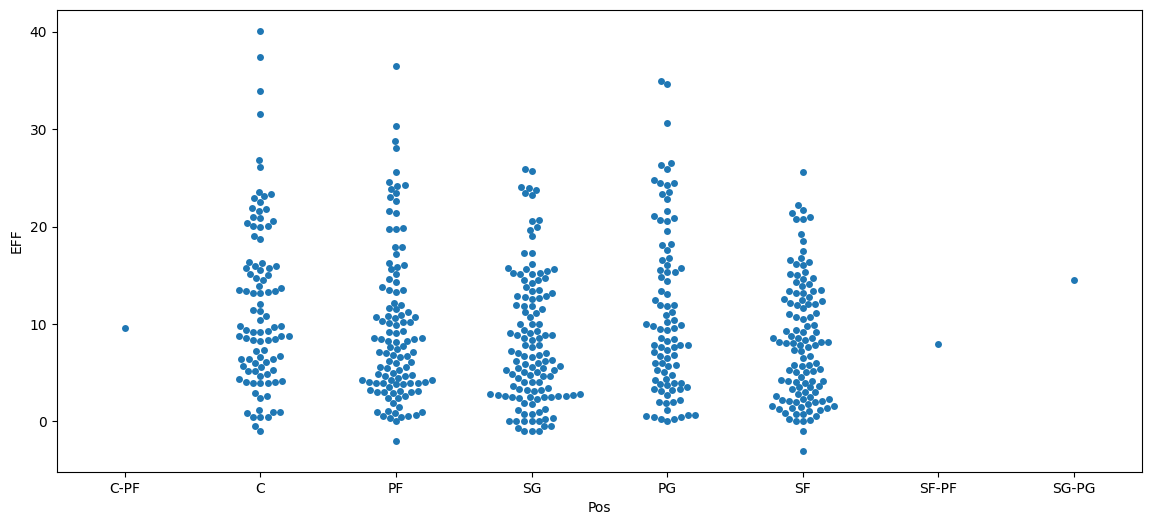

In [7]:
plt.figure(figsize=(14,6))
sns.swarmplot(
    x=players["Pos"],
    y=players["EFF"]
)

In [8]:
ages = players.Age.describe().round(decimals=1) # used to specify the first 25%, defining what is a young player
points = players.PTS.describe().round(decimals=1)

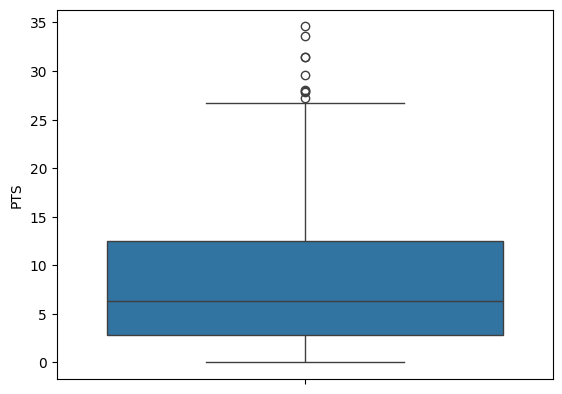

In [9]:
sns.boxplot(data=players, y="PTS");

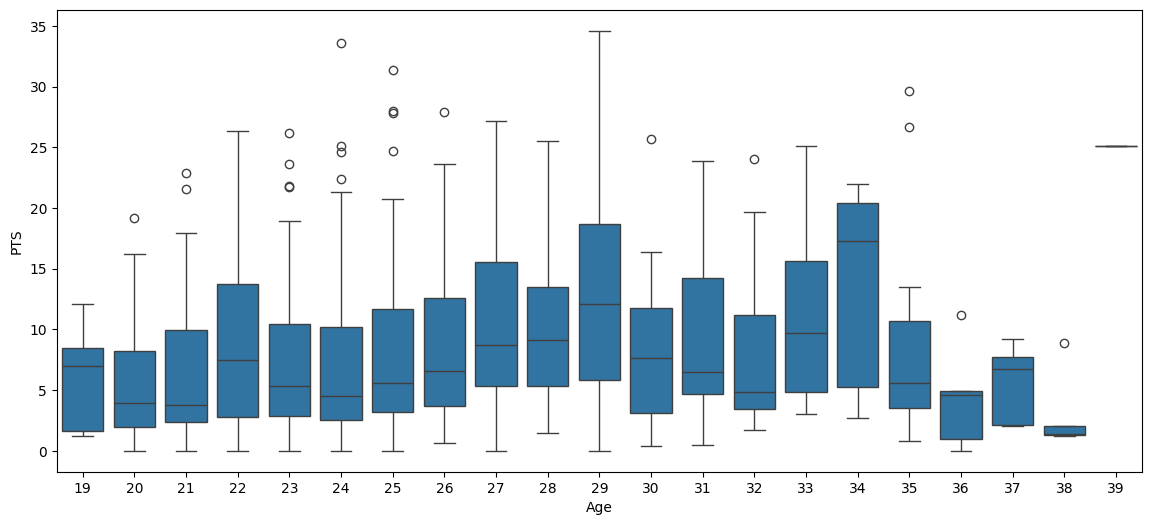

In [10]:
plt.figure(figsize=(14,6))
sns.boxplot(data=players, x="Age", y="PTS");

With the graph below, we can see that within <23y (what we have defined to be a young age), if we have more than 15 points we are special. Those data will then be used to filter the current base player and keep only special ones.

In [11]:
young_age = ages["25%"]
futur_super_star_def = f"(EFF >= 12) & (PTS >= 15) & (Age <= {young_age})"
players.query(futur_super_star_def).sort_values("EFF", ascending=False).sort_values(["Age", "EFF"], ascending=True)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
442,423,Shaedon Sharpe,SG,20,POR,31,25,33.5,5.6,13.5,...,1.3,3.7,5.0,3.0,0.9,0.4,2.3,2.7,16.2,14.7
515,492,Victor Wembanyama,PF,20,SAS,32,32,28.9,7.1,15.8,...,2.1,8.1,10.2,3.1,1.2,3.2,3.1,2.3,19.2,24.2
179,168,Jalen Green,SG,21,HOU,36,36,30.4,5.8,14.3,...,0.4,4.3,4.6,3.3,0.6,0.3,2.2,1.3,17.3,14.5
27,24,Paolo Banchero,PF,21,ORL,37,37,35.0,8.1,17.7,...,1.2,5.9,7.1,4.8,1.1,0.6,3.3,2.2,22.9,21.4
214,203,Chet Holmgren,C,21,OKC,36,36,30.1,6.7,12.1,...,1.5,5.9,7.4,2.7,0.6,2.6,1.8,2.7,17.9,23.3
437,418,Alperen ?engün,C,21,HOU,36,36,32.3,8.5,15.8,...,2.6,6.4,9.0,5.0,1.2,0.7,2.5,3.4,21.6,26.1
474,453,Cam Thomas,SG,22,BRK,28,20,28.5,7.5,17.4,...,0.3,2.2,2.5,2.1,0.6,0.3,1.6,1.9,20.3,13.5
526,503,Jalen Williams,PF,22,OKC,33,33,32.1,7.0,12.9,...,0.4,3.7,4.1,4.4,1.1,0.5,1.9,2.7,18.2,19.9
113,104,Cade Cunningham,PG,22,DET,36,36,34.5,8.5,19.0,...,0.4,3.6,4.1,7.3,1.0,0.3,3.8,2.8,22.8,20.6
502,479,Franz Wagner,SF,22,ORL,34,34,33.4,7.7,16.5,...,1.1,4.8,5.9,3.9,1.1,0.4,1.9,2.3,20.9,20.8


## Lets do some feature engineering

In [19]:
import pandas as pd

filename = "/Users/louisar/Documents/DevVsCode/Efrei/mlops-nba-louisar/data/full_data/2023-2024 NBA Player Stats - Regular.csv"
print(f"Runnung on file: {filename}")
players = pd.read_csv(filename,sep =",", encoding='Windows-1252')

players["EFF"] = players.PTS + players.TRB + players.AST + players.STL + players.BLK - (players.FGA - players.FG) - (players.FTA - players.FT) - players.TOV

young_age = ages["25%"]

futur_super_star_def = f"(EFF >= 12) & (PTS >= 15) & (Age <= {young_age})"
# add a col "futur_star" who will be 1 if the player is a futur star, 0 otherwise
players["futur_star"] = 0
players.loc[players.query(futur_super_star_def).index, "futur_star"] = 1

players["futur_star"].value_counts()

Runnung on file: /Users/louisar/Documents/DevVsCode/Efrei/mlops-nba-louisar/data/full_data/2023-2024 NBA Player Stats - Regular.csv


futur_star
0    522
1     24
Name: count, dtype: int64